# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who:** The Insurify driving incident rates by state dataset is useful for government regulators, safety organizations, and insurance companies. Groups focused on improving road safety can use this to learn more about where there is increased risk and need for focused efforts. As for insurance companies, they can identify how to price policies differently in different areas based on the inherent risk of driving there.

**What:** This data can be used to encourage focused efforts in different areas to improve education, crackdown on infractions, or spend on infrastructure. I want the audience to agree that there are disparities in driving safety, prompting thinking about how to make positive changes.

**How:** As it was used on a website (insurify.com), I think it is well suited to that, although they did not show all of the data. Since this data is not well suited to machine learning techniques, and leans towards exploratory analysis, it can be explained and shown well in written form with charts. Using map based graphs as well could be an engaging way to display the information as well.

# 3. Homework - work with your own data

In [47]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [48]:
data = pd.read_csv('driving_incident_rates_by_state_000.csv')

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()
    - *There are 8 columns: state_id (str), state_name (str), avg_yearly_miles (int), drivers_with_speeding_ticket (float), drivers_with_accident (float), drivers_with_dui (float), drivers_with_incident (float), last_updated_on (str)*
    - *All columns have 52 non-null values, and the summary statistics for each of the number columns are displayed after describe()*

- Are there any duplicate rows?
    - *There are no duplicate rows*

- Are there any duplicate values in a given column (when this would be inappropriate?)
    - *There are no inappropriate duplicate columns - which would only be inappropriate in the case of duplicate state names/ids.*

- What are the mean, median, and mode of each column?
    - *They are displayed below.*

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

    - *There are no missing values to fill in.*

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
    - *N/A*

- Encode any categorical variables (e.g. with one-hot encoding.)
    - *N/A*

### Conclusions:

- Are the data usable?  If not, find some new data!
    - *Yes, this data would be great for gaining insight into state disparities in driving incidents*

- Do you need to modify or correct the data in some way?
    - *No, this dataset is well cleaned and updated*

- Is there any class imbalance?  (Categories that have many more items than other categories).
    - *No, there are no classes, and every columns is of equal length*

In [49]:
data.head()

,state_id,state_name,avg_yearly_miles,drivers_with_speeding_ticket,drivers_with_accident,drivers_with_dui,drivers_with_incident,last_updated_on
0,IL,Illinois,7187,0.0279,0.0401,0.0042,0.0670,2025-02-02
1,KY,Kentucky,7438,0.0317,0.0474,0.0078,0.0787,2025-02-02
2,MA,Massachusetts,7669,0.0325,0.0791,0.0060,0.1025,2025-02-02
3,NJ,New Jersey,7050,0.0324,0.0499,0.0052,0.0790,2025-02-02
4,ND,North Dakota,7491,0.0950,0.0538,0.0246,0.1495,2025-02-02


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state_id                      52 non-null     object 
 1   state_name                    52 non-null     object 
 2   avg_yearly_miles              52 non-null     int64  
 3   drivers_with_speeding_ticket  52 non-null     float64
 4   drivers_with_accident         52 non-null     float64
 5   drivers_with_dui              52 non-null     float64
 6   drivers_with_incident         52 non-null     float64
 7   last_updated_on               52 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 3.4+ KB


In [51]:
data.describe()

,avg_yearly_miles,drivers_with_speeding_ticket,drivers_with_accident,drivers_with_dui,drivers_with_incident
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,7404.403846,0.044494,0.054883,0.009137,0.098519
std,396.663450,0.014409,0.009745,0.005095,0.019600
min,6626.000000,0.018500,0.024600,0.002900,0.059200
25%,7085.000000,0.034675,0.050350,0.005700,0.083600
50%,7438.000000,0.040500,0.053950,0.007850,0.097250
75%,7671.750000,0.054100,0.060150,0.010650,0.112575
max,8686.000000,0.095000,0.079100,0.027200,0.149500


In [52]:
# Checking for duplicate columns
data.duplicated().sum()

np.int64(0)

In [53]:
# Checking for inappropriate duplicates in columns
data['state_id'].duplicated().sum(), data['state_name'].duplicated().sum()

(np.int64(0), np.int64(0))

In [54]:
# Mean Median and Mode of numeric columns
for col in data.select_dtypes(include=['number']).columns:
    print(f'{col}:')
    print(f'\tMean: {data[col].mean()}')
    print(f'\tMedian: {data[col].median()}')
    print(f'\tMode: {data[col].mode().values}')

avg_yearly_miles:
	Mean: 7404.403846153846
	Median: 7438.0
	Mode: [7438 7684]
drivers_with_speeding_ticket:
	Mean: 0.044494230769230765
	Median: 0.040499999999999994
	Mode: [0.0317]
drivers_with_accident:
	Mean: 0.054882692307692306
	Median: 0.05395
	Mode: [0.0525 0.0579 0.0582 0.0649]
drivers_with_dui:
	Mean: 0.009136538461538463
	Median: 0.00785
	Mode: [0.0069]
drivers_with_incident:
	Mean: 0.09851923076923079
	Median: 0.09725
	Mode: [0.089]


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [55]:
# ChatGPT: Can you generate 5 sets of 6 points ranging from 0 to 1. Please make 3 of them in the top half of that range and crossing eachother at a few points when graphed.
# The other two should be in the bottom half and also cross eachother.

# Generate 3 sets in the top half (0.5 to 1), ensuring some crossing points
top_sets = [
    np.array([0.6, 0.8, 0.7, 0.9, 1.0, 0.85]),
    np.array([0.7, 0.9, 0.6, 1.0, 0.8, 0.75]),
    np.array([0.65, 0.85, 0.75, 0.6, 0.9, 0.7])
]

# Generate 2 sets in the bottom half (0 to 0.5), ensuring some crossing points
bottom_sets = [
    np.array([0.2, 0.4, 0.3, 0.1, 0.5, 0.35]),
    np.array([0.3, 0.1, 0.4, 0.2, 0.45, 0.25])
]

sets = top_sets + bottom_sets
x = np.linspace(2010,2015,6)

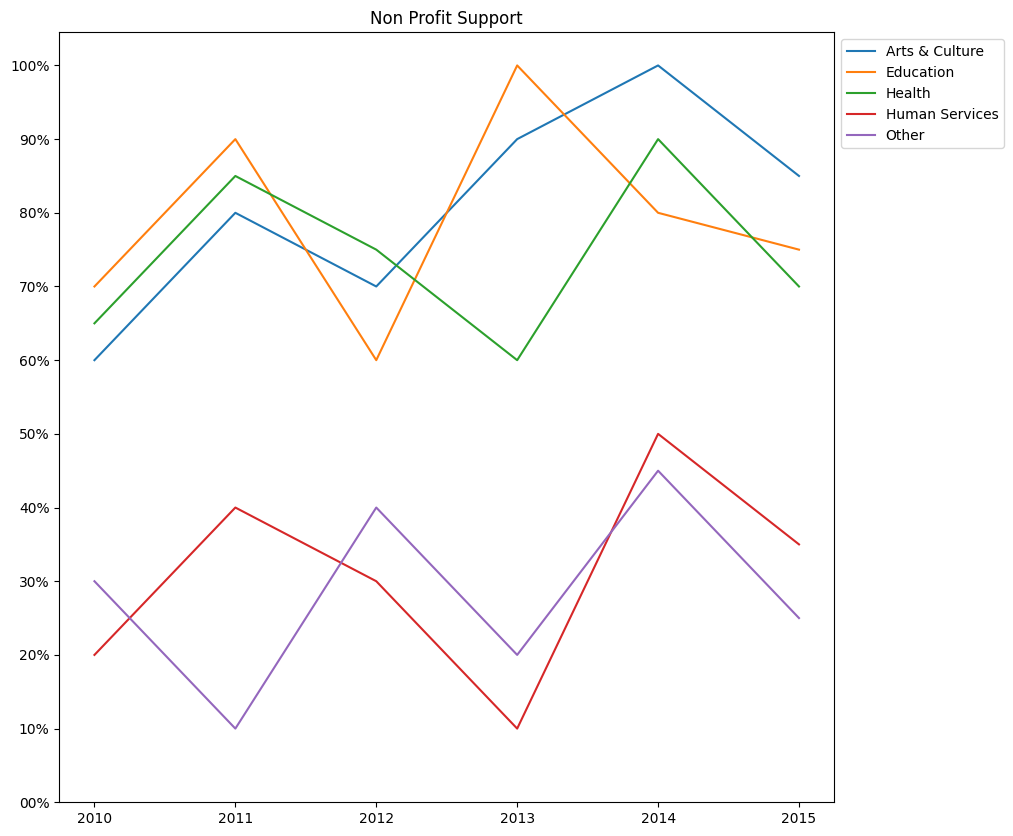

In [56]:
import matplotlib.pyplot as plt

labels = ['Arts & Culture', 'Education', 'Health', 'Human Services', 'Other']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.plot(x, sets[i], label=labels[i])

plt.title('Non Profit Support')
plt.yticks([i/10 for i in range(0,11)], [f'{i}0%' for i in range(0,11)])
plt.legend(loc='best', bbox_to_anchor=(1, 1)) # ChatGPT: How to place legend outside the plot
plt.show()